In [1]:
from load_data import *
import matplotlib.pyplot as plt

In [2]:
utterances, labels, dico_labels = load_data("train", 127)
print('Nombre de labels original :', len(dico_labels))

Nombre de labels original : 38


([<matplotlib.axis.XTick at 0x172a4dd65f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

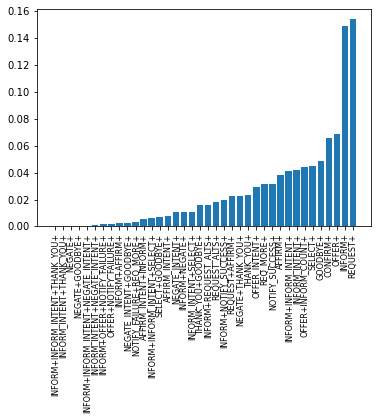

In [3]:
##plot histogram of labels before preprocessing
dico_labels = dict(sorted(dico_labels.items(), key=lambda item: item[1]))
s = sum(list(dico_labels.values()))
v = [v / s for v in list(dico_labels.values())]
plt.bar(dico_labels.keys(), v)
plt.xticks(list(dico_labels.keys()), rotation=90, size=8)

In [4]:
##first preprocessing
labels_preprocessed = label_preprocessing_greetings(labels)
dico_labels_preprocessed = label_dict_occ(labels_preprocessed)
print('Nombre de labels après le preprocessing des greetings :', len(dico_labels_preprocessed))

Nombre de labels après le preprocessing des greetings : 32


([<matplotlib.axis.XTick at 0x172a4da1930>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

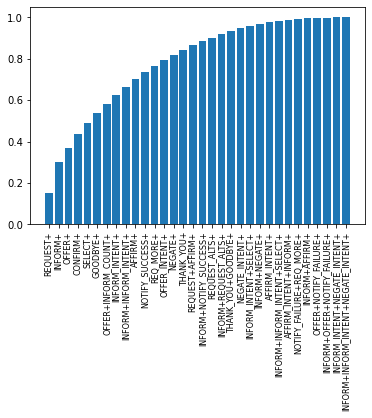

In [5]:
##plot cumulative histogram of the frequences of the labels after first preprocessing
dico_labels_preprocessed = dict(sorted(dico_labels_preprocessed.items(), key=lambda item: item[1], reverse=True))
s = sum(list(dico_labels_preprocessed.values()))
v = [v / s for v in list(dico_labels_preprocessed.values())]
v_cum = np.cumsum(v)
plt.bar(dico_labels_preprocessed.keys(), v_cum)
plt.xticks(list(dico_labels_preprocessed.keys()), rotation=90, size=8)

In [6]:
#searching labels which are representing 90% of labels
for i in range(len(v_cum)):
    if v_cum[i] > 0.9:
        break
intents_to_keep = list(dico_labels_preprocessed.keys())[0:i]
print(intents_to_keep)

['REQUEST+', 'INFORM+', 'OFFER+', 'CONFIRM+', 'SELECT+', 'GOODBYE+', 'OFFER+INFORM_COUNT+', 'INFORM_INTENT+', 'INFORM+INFORM_INTENT+', 'AFFIRM+', 'NOTIFY_SUCCESS+', 'REQ_MORE+', 'OFFER_INTENT+', 'NEGATE+', 'THANK_YOU+', 'REQUEST+AFFIRM+', 'INFORM+NOTIFY_SUCCESS+']


In [7]:
##second preprocessing
labels_dbl_preprocessed = label_preprocessing_combinations(labels_preprocessed, intents_to_keep)
dico_labels_dbl_preprocessed = label_dict_occ(labels_dbl_preprocessed)
print('Nombre de labels après avoir simplifié les labels peu fréquents complexes :',len(dico_labels_dbl_preprocessed))

Nombre de labels après avoir simplifié les labels peu fréquents complexes : 13


Nombre final de labels : 13


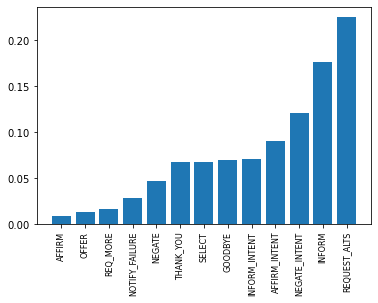

In [11]:
##plot histogram of the frequences of the labels after second preprocessing
dico_labels = dict(sorted(dico_labels_dbl_preprocessed.items(), key=lambda item: item[1]))
s = sum(list(dico_labels.values()))
v = [v / s for v in list(dico_labels.values())]
plt.bar(dico_labels.keys(), v)
plt.xticks(list(dico_labels.keys()), rotation=90, size=8)
print('Nombre final de labels :', len(dico_labels))